In [19]:
import numpy as np

In [21]:
import matplotlib.pyplot as plt

In [32]:
from scipy import special

In [ ]:
import respy

In [3]:
rock = respy.RRock(xperm=200,yperm=200,zperm=200,poro=0.15)

In [4]:
rock.poro

array([0.15])

In [6]:
rock.xperm

array([200.])

In [7]:
fluid = respy.Fluid(visc=1.5,fvf=1.2)

In [10]:
fluid.visc

array([1.5])

In [13]:
well = respy.Well(0,orate=800*1.2,skin=0,radius=0.25)

In [15]:
well.cond

960.0000000000001

In [16]:
well.skin

0

In [17]:
well.radius

0.25

In [18]:
well.sort

'orate'

In [52]:
class Reservoir():

    def __init__(self,area,height,pinit):
        self.area = area
        self.radius = None
        self.height = height
        self.pinit = pinit

    @property
    def area(self):
        return self._area/(43560*0.3048**2)

    @area.setter
    def area(self,value):
        self._area = value*43560*0.3048**2
        
    @property
    def radius(self):
        return self._radius/0.3048

    @radius.setter
    def radius(self,value):
        self._radius = np.sqrt(self._area/np.pi)

    @property
    def height(self):
        return self._height/0.3048

    @height.setter
    def height(self,value):
        self._height = value*0.3048

    @property
    def pinit(self):
        return self._pinit/6894.76

    @pinit.setter
    def pinit(self,value):
        self._pinit = value*6894.76

In [53]:
res = Reservoir(40,30,4500)

In [54]:
def pseudo(time,res,rock,fluid,well):

    CA = 30.8828
    _ct = 25e-6/6894.76
    _time = time*(24*60*60)
    
    constant = (well._cond*fluid._fvf*fluid._visc)/(2*np.pi*rock._xperm*res._height)

    gamma = 0.5772

    inner = (4*res._area)/(np.exp(gamma)*well._radius**2*CA)

    _rate_deltap = constant*(1/2*np.log(inner)+well.skin)

    _Vp = res._area*res._height*rock.poro

    _pss_deltap = (well._cond*fluid.fvf)/(_Vp*_ct)*_time
    
    return (res._pinit-_rate_deltap-_pss_deltap)/6894.76

In [55]:
time = np.logspace(-5,1.5)

In [56]:
time

array([1.00000000e-05, 1.35722878e-05, 1.84206997e-05, 2.50011038e-05,
       3.39322177e-05, 4.60537826e-05, 6.25055193e-05, 8.48342898e-05,
       1.15139540e-04, 1.56270698e-04, 2.12095089e-04, 2.87861559e-04,
       3.90693994e-04, 5.30261134e-04, 7.19685673e-04, 9.76778110e-04,
       1.32571137e-03, 1.79929362e-03, 2.44205309e-03, 3.31442475e-03,
       4.49843267e-03, 6.10540230e-03, 8.28642773e-03, 1.12465782e-02,
       1.52641797e-02, 2.07169840e-02, 2.81176870e-02, 3.81621341e-02,
       5.17947468e-02, 7.02973212e-02, 9.54095476e-02, 1.29492584e-01,
       1.75751062e-01, 2.38534401e-01, 3.23745754e-01, 4.39397056e-01,
       5.96362332e-01, 8.09400122e-01, 1.09854114e+00, 1.49097166e+00,
       2.02358965e+00, 2.74647411e+00, 3.72759372e+00, 5.05919749e+00,
       6.86648845e+00, 9.31939576e+00, 1.26485522e+01, 1.71669791e+01,
       2.32995181e+01, 3.16227766e+01])

In [58]:
pwf_pss = pseudo(time,res,rock,fluid,well)

In [59]:
pwf_pss

array([4204.68831164, 4204.68819376, 4204.68803376, 4204.68781662,
       4204.6875219 , 4204.6871219 , 4204.68657901, 4204.68584218,
       4204.68484213, 4204.68348484, 4204.68164269, 4204.67914246,
       4204.67574909, 4204.6711435 , 4204.66489266, 4204.65640885,
       4204.64489437, 4204.62926659, 4204.60805612, 4204.57926866,
       4204.54019748, 4204.48716896, 4204.41519712, 4204.31751488,
       4204.18493772, 4204.00500018, 4203.76078378, 4203.42932625,
       4202.97946255, 4202.36889458, 4201.54021417, 4200.41550526,
       4198.88901796, 4196.81722545, 4194.00532903, 4190.18894227,
       4185.00923231, 4177.97918087, 4168.43779271, 4155.48794606,
       4137.91204146, 4114.05751786, 4081.68147181, 4037.73977024,
       3978.10082809, 3897.15713923, 3787.2980349 , 3638.19409643,
       3435.82593949, 3161.16605214])

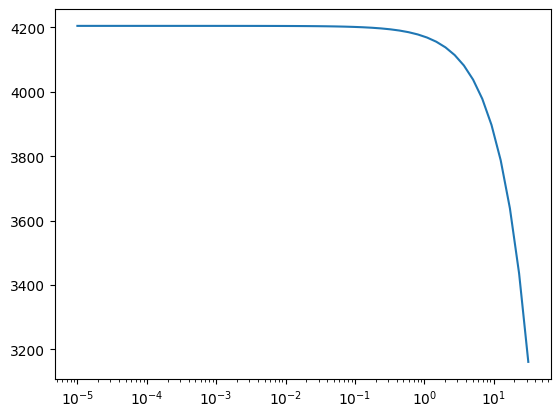

In [61]:
plt.semilogx(time,pwf)
plt.show()

In [62]:
def transient(time,res,rock,fluid,well):

    _ct = 25e-6/6894.76
    _time = time*(24*60*60)

    constant = -(well._cond*fluid._fvf*fluid._visc)/(2*np.pi*rock._xperm*res._height)

    _eta = rock._xperm/(rock._poro*fluid._visc*_ct)

    inner = (-1/2*special.expi(-(well._radius**2)/(4*_eta*_time))+well.skin)

    return (res._pinit+constant*inner)/6894.76

In [64]:
pwf_transient = transient(time,res,rock,fluid,well)

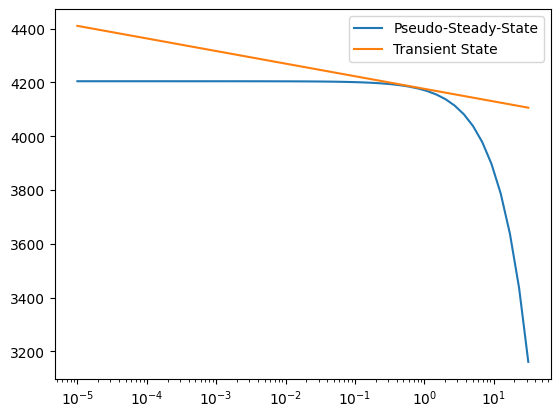

In [65]:
plt.semilogx(time,pwf_pss,label="Pseudo-Steady-State")
plt.semilogx(time,pwf_transient,label="Transient State")

plt.legend()

plt.show()